<a href="https://colab.research.google.com/github/DGkurnia/cnkproject/blob/main/reference_klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Perkenalan diri
## Nama : Derfansyah Guswiranata Kurnia (wira)
## id dicoding: dgkurnia
## email dicoding : weerakurnia@gmail.com

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
#inisiasi perpustakaan awal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#impor data dr google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Perpustakaan untuk sklearn
from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc, precision_recall_curve
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler

In [ ]:
#impor akurasi
from sklearn.metrics import accuracy_score

In [ ]:
#inisiasi 'learning curve'
from sklearn.model_selection import learning_curve

In [ ]:
#impor pohon keputusan
from sklearn.tree import plot_tree

In [ ]:
#impor model
from sklearn.feature_selection import SelectFromModel

In [ ]:
#klasifikais hutan
from sklearn.ensemble import RandomForestClassifier

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [ ]:
#Inisiasi pengunduhan dataset dr google
clabnb = pd.read_csv('/content/drive/MyDrive/csv-files/clusairbnb.csv')
#persiapan salinan
clabnbii = clabnb.copy()
clabnbii.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Data yang dipakai adalah **'clabnbii'** yang merupakan salinan

In [ ]:
#Persiapan segmentasi (pengabaian identitas untuk kemudahan)
clabnbii[['id','host_id']] = clabnbii[['id','host_id']].astype(str).copy()
clabnbii.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  object 
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  object 
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Pengabaian identitas karna "salah jenis data"

In [ ]:
#persiapan pengujian kluster
clsinvst = clabnbii.iloc[:, 9:].copy() #cek dari harga
clsinvst = clsinvst.drop('last_review', axis=1).copy() #kolom tanggal tak usah
clsinvst.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   price                           48895 non-null  int64 
 1   minimum_nights                  48895 non-null  int64 
 2   number_of_reviews               48895 non-null  int64 
 3   reviews_per_month               48895 non-null  int64 
 4   calculated_host_listings_count  48895 non-null  int64 
 5   availability_365                48895 non-null  int64 
 6   Cluster                         48895 non-null  object
dtypes: int64(6), object(1)
memory usage: 2.6+ MB


seperti pembentukan kluster

In [ ]:
#Identifikasi kluster dahulu melalui deklarasi kluster
kelcl = clsinvst['Cluster'].unique().copy()
kelcl
#ke pemecahan

array(['unit asing', 'unit kurang populer', 'opsi pelancong irit',
       'sesi unit favorit di musim tertentu',
       'bisa untuk portofolio pemilik', 'unit sangat direkomendasikan',
       'ada perencanaan dulu'], dtype=object)

Rincian kluster

In [ ]:
#pemecahan untuk jaga-jaga
[kelcli, kelclii, kelcliii, kelcliv, kelclv, kelclvi, kelclvii] = kelcl #pemecahan menjadi satu komponen
print(kelcli) #cek satu komponen

unit asing


pemeriksaan rinci (jika perlu)

# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [ ]:
#Inisiasi pemisahan
ycl = clsinvst['Cluster'].copy()
ycl.info()

<class 'pandas.core.series.Series'>
RangeIndex: 48895 entries, 0 to 48894
Series name: Cluster
Non-Null Count  Dtype 
--------------  ----- 
48895 non-null  object
dtypes: object(1)
memory usage: 382.1+ KB


sumbu 'y' di uji kluster

In [ ]:
#sumbu x (X)
Xcl = Xcl = clsinvst.drop('Cluster', axis=1).copy() #di luar kluster
Xcl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   price                           48895 non-null  int64
 1   minimum_nights                  48895 non-null  int64
 2   number_of_reviews               48895 non-null  int64
 3   reviews_per_month               48895 non-null  int64
 4   calculated_host_listings_count  48895 non-null  int64
 5   availability_365                48895 non-null  int64
dtypes: int64(6)
memory usage: 2.2 MB


Nilai x (pembanding) adalah parameter lain

In [ ]:
#Numerisasi kluster dengan 'tiruan'
yclnum = pd.get_dummies(ycl).reset_index(drop=True).copy()
yclnum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   ada perencanaan dulu                 48895 non-null  bool 
 1   bisa untuk portofolio pemilik        48895 non-null  bool 
 2   opsi pelancong irit                  48895 non-null  bool 
 3   sesi unit favorit di musim tertentu  48895 non-null  bool 
 4   unit asing                           48895 non-null  bool 
 5   unit kurang populer                  48895 non-null  bool 
 6   unit sangat direkomendasikan         48895 non-null  bool 
dtypes: bool(7)
memory usage: 334.4 KB


Nilai yang dibandingkan adalah numerisasi kluster

### Rincian unit yang diperiksa
- Unit y adalah numerisasi kluster
- Unit X adalah unit lain

In [ ]:
#Pemisahan pelatihan dan tes
Xcltrain, Xcltest, ycltrain, ycltest = train_test_split(Xcl, yclnum, test_size=0.25, random_state=40)

In [ ]:
#Cek komponen
print(Xcltrain.shape)
print(Xcltest.shape)
print(ycltrain.shape)
print(ycltest.shape)

(36671, 6)
(12224, 6)
(36671, 7)
(12224, 7)


Aspek yang diperiksa
* i. Xcltrain = klasifikasi sumbu 'X' untuk latihan
* ii. Xcltest = klasifikasi sumbu 'X' untuk pengujian   
* iii. ycltrain = klasifikasi sumbu 'y' untuk latihan
* iv. ycltest = klasifikasi sumbu 'y' untuk pengujian

# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

In [ ]:
#Inisiasi rcf (seleksi fitur demi efisiensi ram)
pilihan = SelectFromModel(RandomForestClassifier(n_estimators=10, random_state=40))
pilihan.fit(Xcltrain, ycltrain) #pelatihan untuk Xcl dan ycl (klasifikasi X dan y)
#seleksi pelatihan
Xtrpil = pilihan.transform(Xcltrain) #sumbu X latihan
Xtspil = pilihan.transform(Xcltest) # Sumbu X bagian uji

Tahap pertama adalah penyetelan nilai RCF dengan pilihan model demi efisiensi RAM

In [ ]:
#cek bentuk pilihan
print(Xtrpil.shape)
print(Xtspil.shape)

(36671, 3)
(12224, 3)


Brntuk tes di 'Xtrpil' dan uji di 'Xtspil'

In [ ]:
#Inspeksi nilai ccp alpa yang sesuai (inspeksi kisaran nilai)
nialpf = np.arange(0.0015, 0.15, 7.5e-4) #pemeriksaan nilai ccp alpha
habaik = [] #cek hasil
itmaks = 150 #iterasi tertinggi
tolerance = 0.0175 #toleransi
#iterasi untuk pemeriksaan

deklarasi kisaran nilai **"ccp alpha"** sebelum iterasi

In [ ]:
# Iterasi untuk nilai ccp alpha
best_alpha = None #awal nilai
best_accuracy = -np.inf  # Awal rendah untuk akurasi
best_f1 = -np.inf  # Awal rendah untuk nilai f1

# Iterasi untuk pemeriksaan kisaran nilai ccp alpha
for iteration in range(itmaks):
    for alpha in nialpf:
        rclasf = RandomForestClassifier(ccp_alpha=alpha, random_state=40)
        rclasf.fit(Xcltrain, ycltrain)

        # Fasa prediksi
        y_pred = rclasf.predict(Xcltest)

        # Pengubahan nilai argumen
        ycltest_single = np.argmax(ycltest.values, axis=1)
        y_pred_single = np.argmax(y_pred, axis=1)

        # NIlai kalkulasi
        accuracy = accuracy_score(ycltest_single, y_pred_single)
        f1 = f1_score(ycltest_single, y_pred_single, average='weighted')
        precision = precision_score(ycltest_single, y_pred_single, average='weighted')
        recall = recall_score(ycltest_single, y_pred_single, average='weighted')
        conf_matrix = confusion_matrix(ycltest_single, y_pred_single)
        #pencetakan nilai terbaik saat iterasi
        print(f'skor ccp_alpha: {alpha:.3f}, Akurasi: {accuracy:.2f}, '
              f'Nilai F1: {f1:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}')
        print(f'Confusion Matrix:\n{conf_matrix}\n')

        # Pembaruan periodik dalam iterasi
        if accuracy > best_accuracy or (accuracy == best_accuracy and f1 > best_f1):
            best_alpha = alpha
            best_accuracy = accuracy
            best_f1 = f1

    #Deklarasi nilai ccp setelah iterasi
    print(f'Nilai ccp terbaik setelah iterasi {iteration + 1}: {best_alpha}, '
          f'Akurasi: {best_accuracy:.2f}, Nilai F1: {best_f1:.2f}')

    # Penyetelan dinamis
    nialpf = np.linspace(max(0.001, best_alpha - 0.005), min(0.1, best_alpha + 0.005), num=10)

    # Periksa toleransi
    if iteration > 0 and abs(best_accuracy - previous_best_accuracy) < tolerance:
        print("No significant improvement. Stopping the search.")
        break
    #penghentian karena toleransi
    previous_best_accuracy = best_accuracy

# Deklarasi fasa akhir
print(f'Nilai terbaik untuk ccp_alpha: {best_alpha}, '
      f'Akurasi: {best_accuracy:.2f}, Nilai F1: {best_f1:.2f}')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.002, Akurasi: 0.96, Nilai F1: 0.95, Precision: 0.94, Recall: 0.96
Confusion Matrix:
[[9677    0    0    0  122    0    0]
 [  62    0    0    0    0    0    0]
 [ 131    0   27    0    0    0    0]
 [   8    0    0  266    0    0    0]
 [ 108    0    0    0 1727    0    0]
 [  70    0    0    0    0    0    0]
 [  22    0    0    1    3    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.002, Akurasi: 0.95, Nilai F1: 0.94, Precision: 0.93, Recall: 0.95
Confusion Matrix:
[[9676    0    0    0  123    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [  21    0    0  253    0    0    0]
 [ 132    0    0    0 1703    0    0]
 [  70    0    0    0    0    0    0]
 [  22    0    0    1    3    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.003, Akurasi: 0.95, Nilai F1: 0.93, Precision: 0.92, Recall: 0.95
Confusion Matrix:
[[9676    0    0    0  123    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [  79    0    0  195    0    0    0]
 [ 140    0    0    0 1695    0    0]
 [  70    0    0    0    0    0    0]
 [  23    0    0    0    3    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.004, Akurasi: 0.93, Nilai F1: 0.91, Precision: 0.88, Recall: 0.93
Confusion Matrix:
[[9670    0    0    0  129    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 142    0    0    0 1693    0    0]
 [  70    0    0    0    0    0    0]
 [  23    0    0    0    3    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.005, Akurasi: 0.93, Nilai F1: 0.91, Precision: 0.88, Recall: 0.93
Confusion Matrix:
[[9677    0    0    0  122    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 162    0    0    0 1673    0    0]
 [  70    0    0    0    0    0    0]
 [  23    0    0    0    3    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.005, Akurasi: 0.92, Nilai F1: 0.89, Precision: 0.87, Recall: 0.92
Confusion Matrix:
[[9742    0    0    0   57    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 380    0    0    0 1455    0    0]
 [  70    0    0    0    0    0    0]
 [  23    0    0    0    3    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.006, Akurasi: 0.92, Nilai F1: 0.89, Precision: 0.87, Recall: 0.92
Confusion Matrix:
[[9745    0    0    0   54    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 394    0    0    0 1441    0    0]
 [  70    0    0    0    0    0    0]
 [  23    0    0    0    3    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.007, Akurasi: 0.91, Nilai F1: 0.89, Precision: 0.87, Recall: 0.91
Confusion Matrix:
[[9749    0    0    0   50    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 405    0    0    0 1430    0    0]
 [  70    0    0    0    0    0    0]
 [  23    0    0    0    3    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.008, Akurasi: 0.91, Nilai F1: 0.89, Precision: 0.87, Recall: 0.91
Confusion Matrix:
[[9746    0    0    0   53    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 426    0    0    0 1409    0    0]
 [  70    0    0    0    0    0    0]
 [  23    0    0    0    3    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.008, Akurasi: 0.91, Nilai F1: 0.89, Precision: 0.87, Recall: 0.91
Confusion Matrix:
[[9747    0    0    0   52    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 438    0    0    0 1397    0    0]
 [  70    0    0    0    0    0    0]
 [  23    0    0    0    3    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.009, Akurasi: 0.91, Nilai F1: 0.89, Precision: 0.87, Recall: 0.91
Confusion Matrix:
[[9754    0    0    0   45    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 449    0    0    0 1386    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.010, Akurasi: 0.91, Nilai F1: 0.88, Precision: 0.87, Recall: 0.91
Confusion Matrix:
[[9766    0    0    0   33    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 513    0    0    0 1322    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.011, Akurasi: 0.91, Nilai F1: 0.88, Precision: 0.87, Recall: 0.91
Confusion Matrix:
[[9787    0    0    0   12    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 554    0    0    0 1281    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.011, Akurasi: 0.91, Nilai F1: 0.88, Precision: 0.87, Recall: 0.91
Confusion Matrix:
[[9787    0    0    0   12    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 554    0    0    0 1281    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.012, Akurasi: 0.91, Nilai F1: 0.88, Precision: 0.87, Recall: 0.91
Confusion Matrix:
[[9787    0    0    0   12    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 555    0    0    0 1280    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.013, Akurasi: 0.89, Nilai F1: 0.87, Precision: 0.86, Recall: 0.89
Confusion Matrix:
[[9795    0    0    0    4    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 707    0    0    0 1128    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.014, Akurasi: 0.89, Nilai F1: 0.87, Precision: 0.86, Recall: 0.89
Confusion Matrix:
[[9795    0    0    0    4    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 707    0    0    0 1128    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.014, Akurasi: 0.89, Nilai F1: 0.87, Precision: 0.86, Recall: 0.89
Confusion Matrix:
[[9795    0    0    0    4    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 707    0    0    0 1128    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.015, Akurasi: 0.89, Nilai F1: 0.87, Precision: 0.86, Recall: 0.89
Confusion Matrix:
[[9795    0    0    0    4    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 712    0    0    0 1123    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.016, Akurasi: 0.89, Nilai F1: 0.87, Precision: 0.86, Recall: 0.89
Confusion Matrix:
[[9795    0    0    0    4    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 712    0    0    0 1123    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.017, Akurasi: 0.89, Nilai F1: 0.87, Precision: 0.86, Recall: 0.89
Confusion Matrix:
[[9795    0    0    0    4    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 712    0    0    0 1123    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.017, Akurasi: 0.89, Nilai F1: 0.87, Precision: 0.86, Recall: 0.89
Confusion Matrix:
[[9795    0    0    0    4    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 712    0    0    0 1123    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.018, Akurasi: 0.89, Nilai F1: 0.86, Precision: 0.86, Recall: 0.89
Confusion Matrix:
[[9795    0    0    0    4    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 723    0    0    0 1112    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.019, Akurasi: 0.89, Nilai F1: 0.86, Precision: 0.86, Recall: 0.89
Confusion Matrix:
[[9795    0    0    0    4    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 724    0    0    0 1111    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.020, Akurasi: 0.89, Nilai F1: 0.86, Precision: 0.86, Recall: 0.89
Confusion Matrix:
[[9795    0    0    0    4    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 724    0    0    0 1111    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.020, Akurasi: 0.89, Nilai F1: 0.86, Precision: 0.85, Recall: 0.89
Confusion Matrix:
[[9796    0    0    0    3    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 746    0    0    0 1089    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.021, Akurasi: 0.89, Nilai F1: 0.86, Precision: 0.85, Recall: 0.89
Confusion Matrix:
[[9796    0    0    0    3    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 756    0    0    0 1079    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.022, Akurasi: 0.89, Nilai F1: 0.86, Precision: 0.85, Recall: 0.89
Confusion Matrix:
[[9796    0    0    0    3    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 756    0    0    0 1079    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.023, Akurasi: 0.89, Nilai F1: 0.86, Precision: 0.85, Recall: 0.89
Confusion Matrix:
[[9796    0    0    0    3    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 756    0    0    0 1079    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.023, Akurasi: 0.89, Nilai F1: 0.86, Precision: 0.85, Recall: 0.89
Confusion Matrix:
[[9796    0    0    0    3    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 756    0    0    0 1079    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.024, Akurasi: 0.89, Nilai F1: 0.86, Precision: 0.85, Recall: 0.89
Confusion Matrix:
[[9796    0    0    0    3    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 783    0    0    0 1052    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.025, Akurasi: 0.89, Nilai F1: 0.86, Precision: 0.85, Recall: 0.89
Confusion Matrix:
[[9796    0    0    0    3    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 783    0    0    0 1052    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.026, Akurasi: 0.89, Nilai F1: 0.86, Precision: 0.85, Recall: 0.89
Confusion Matrix:
[[9796    0    0    0    3    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 783    0    0    0 1052    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.026, Akurasi: 0.89, Nilai F1: 0.86, Precision: 0.85, Recall: 0.89
Confusion Matrix:
[[9796    0    0    0    3    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 783    0    0    0 1052    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.027, Akurasi: 0.89, Nilai F1: 0.86, Precision: 0.85, Recall: 0.89
Confusion Matrix:
[[9796    0    0    0    3    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 783    0    0    0 1052    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.028, Akurasi: 0.89, Nilai F1: 0.86, Precision: 0.85, Recall: 0.89
Confusion Matrix:
[[9796    0    0    0    3    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 783    0    0    0 1052    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.029, Akurasi: 0.89, Nilai F1: 0.86, Precision: 0.85, Recall: 0.89
Confusion Matrix:
[[9796    0    0    0    3    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 783    0    0    0 1052    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.029, Akurasi: 0.89, Nilai F1: 0.86, Precision: 0.85, Recall: 0.89
Confusion Matrix:
[[9796    0    0    0    3    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 794    0    0    0 1041    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.030, Akurasi: 0.88, Nilai F1: 0.85, Precision: 0.85, Recall: 0.88
Confusion Matrix:
[[9796    0    0    0    3    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 845    0    0    0  990    0    0]
 [  70    0    0    0    0    0    0]
 [  24    0    0    0    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.031, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.032, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.032, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.033, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.034, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.035, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.035, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.036, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.037, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.038, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.038, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.039, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.040, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.041, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.041, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.042, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.043, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.044, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.044, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.045, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.046, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.047, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.047, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.048, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.049, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.050, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.050, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.051, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.052, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.053, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.053, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.054, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.055, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.056, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.056, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.057, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.058, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.059, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.059, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.060, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.061, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.062, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.062, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.063, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.064, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.065, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.065, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.066, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.067, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.068, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.068, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.069, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.070, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.071, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.071, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.072, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.073, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.074, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.074, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.075, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.076, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.077, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.077, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.078, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.079, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.080, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.080, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.081, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.082, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.083, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.083, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.084, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.085, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.086, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.086, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.087, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.088, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.089, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.089, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.090, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.091, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.092, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.092, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.093, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.094, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.095, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.095, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.096, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.097, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.098, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.098, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.099, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.100, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.101, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.101, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.102, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.103, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.104, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.104, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.105, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.106, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.107, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.107, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.108, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.109, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.110, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.110, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.111, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.112, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.113, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.113, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.114, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.115, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.116, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.116, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.117, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.118, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.119, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.119, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.120, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.121, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.122, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.122, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.123, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.124, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.125, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.125, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.126, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.127, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.128, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.128, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.129, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.130, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.131, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.131, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.132, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.133, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.134, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.134, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.135, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.136, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.137, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.137, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.138, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.139, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.140, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.140, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.141, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.142, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.143, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.143, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.144, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.145, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.146, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.146, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.147, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.148, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.149, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.149, Akurasi: 0.80, Nilai F1: 0.71, Precision: 0.64, Recall: 0.80
Confusion Matrix:
[[9799    0    0    0    0    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [1835    0    0    0    0    0    0]
 [  70    0    0    0    0    0    0]
 [  26    0    0    0    0    0    0]]

Nilai ccp terbaik setelah iterasi 1: 0.0015, Akurasi: 0.96, Nilai F1: 0.95


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.001, Akurasi: 0.97, Nilai F1: 0.96, Precision: 0.96, Recall: 0.97
Confusion Matrix:
[[9678    0    0    0  121    0    0]
 [  62    0    0    0    0    0    0]
 [  46    0  112    0    0    0    0]
 [   7    0    0  267    0    0    0]
 [  91    0    0    0 1744    0    0]
 [  50    0    0    0    0   20    0]
 [  23    0    0    1    2    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.002, Akurasi: 0.95, Nilai F1: 0.94, Precision: 0.93, Recall: 0.95
Confusion Matrix:
[[9677    0    0    0  122    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [   9    0    0  265    0    0    0]
 [ 112    0    0    0 1723    0    0]
 [  70    0    0    0    0    0    0]
 [  22    0    0    1    3    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.002, Akurasi: 0.95, Nilai F1: 0.94, Precision: 0.93, Recall: 0.95
Confusion Matrix:
[[9678    0    0    0  121    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [  21    0    0  253    0    0    0]
 [ 132    0    0    0 1703    0    0]
 [  70    0    0    0    0    0    0]
 [  22    0    0    1    3    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.003, Akurasi: 0.95, Nilai F1: 0.93, Precision: 0.92, Recall: 0.95
Confusion Matrix:
[[9675    0    0    0  124    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [  77    0    0  197    0    0    0]
 [ 138    0    0    0 1697    0    0]
 [  70    0    0    0    0    0    0]
 [  22    0    0    1    3    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.003, Akurasi: 0.94, Nilai F1: 0.93, Precision: 0.92, Recall: 0.94
Confusion Matrix:
[[9672    0    0    0  127    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [  97    0    0  177    0    0    0]
 [ 139    0    0    0 1696    0    0]
 [  70    0    0    0    0    0    0]
 [  23    0    0    0    3    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.004, Akurasi: 0.93, Nilai F1: 0.91, Precision: 0.88, Recall: 0.93
Confusion Matrix:
[[9674    0    0    0  125    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 146    0    0    0 1689    0    0]
 [  70    0    0    0    0    0    0]
 [  23    0    0    0    3    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.005, Akurasi: 0.93, Nilai F1: 0.91, Precision: 0.88, Recall: 0.93
Confusion Matrix:
[[9677    0    0    0  122    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 162    0    0    0 1673    0    0]
 [  70    0    0    0    0    0    0]
 [  23    0    0    0    3    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.005, Akurasi: 0.92, Nilai F1: 0.89, Precision: 0.87, Recall: 0.92
Confusion Matrix:
[[9742    0    0    0   57    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 386    0    0    0 1449    0    0]
 [  70    0    0    0    0    0    0]
 [  23    0    0    0    3    0    0]]



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


skor ccp_alpha: 0.006, Akurasi: 0.92, Nilai F1: 0.89, Precision: 0.87, Recall: 0.92
Confusion Matrix:
[[9744    0    0    0   55    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 394    0    0    0 1441    0    0]
 [  70    0    0    0    0    0    0]
 [  23    0    0    0    3    0    0]]

skor ccp_alpha: 0.007, Akurasi: 0.92, Nilai F1: 0.89, Precision: 0.87, Recall: 0.92
Confusion Matrix:
[[9749    0    0    0   50    0    0]
 [  62    0    0    0    0    0    0]
 [ 158    0    0    0    0    0    0]
 [ 274    0    0    0    0    0    0]
 [ 394    0    0    0 1441    0    0]
 [  70    0    0    0    0    0    0]
 [  23    0    0    0    3    0    0]]

Nilai ccp terbaik setelah iterasi 2: 0.001, Akurasi: 0.97, Nilai F1: 0.96
No significant improvement. Stopping the search.
Nilai terbaik untuk ccp_alpha: 0.001, Akurasi: 0.97, Nilai F1: 0.96


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Hasil di bawah adalah proses iterasi demi nilai ccp alfa terbaik yang akan dipakai di **"dinamisasi 'normal'"**
Hal yang diperhatikan :
- Nilai ccp alpha tak boleh melewati "0.03" sebelum nilai akurasi tetap stabil
ke 0.80
- Nilai akurasi di batas itu adalah 0.88

In [ ]:
#Dinamisasi variabel 'Rclasifier'
rclasf = RandomForestClassifier(
    random_state=40,
    n_estimators=50,
    max_depth=8,
    min_samples_split=5,
    min_samples_leaf=3,
    warm_start=True,
    ccp_alpha=best_alpha  # Deklarasi nilai alfa terbaik
)

Nilai variabel 'rclasf' menyatakan modifikasi **'Randomforstclassifier'** untuk nilai ccp alfa yang sudah ditetapkan

## Tulis narasi atau penjelasan algoritma yang Anda gunakan.
### Urutan penyelesaian tugas di normal
### a. Persiapan nilai RCF **('Randomforestclassifier')** sebelum mengecek hasil
### b. Penyetelan nilai ccp alpha demi akurasi benar
### c. deklarasi nilai 'clasifier dengan nilai alpha yang sudah dicari
### d. proses inisalisasi daftar melalui urutan berikut
#### - d.1. pembuatan daftar
#### - d.2. iterasi untuk total estimator demi pemeriksaan matriks
#### - d.3. proses evaluasi nilai akurasi, skor f1, presisi, dan 'recall' sebelum penyimpan hasil iterasi ke daftar yang sudah tersedia
#### - d.4. Penampilan **'confusion matrix'** daftar yang sudah diubah ke dalam bentuk label tunggal
#### - d.5. Proses penyetelan dinamis **ccp alpha**
#### - d.6. insersi pohon alpha di rcf (randomforestclassifier)
#### - d.7. eksekusi di kondisi normal
### Kondisi pemakaian **'Gridsearch CV'** menambahkan penyetelan **gridsearch** sebelum deklarasi ccp alpha


## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Total Pohon: 10, Akurasi: 0.98, Nilai F1: 0.98, Presisi: 0.98, Recall: 0.98


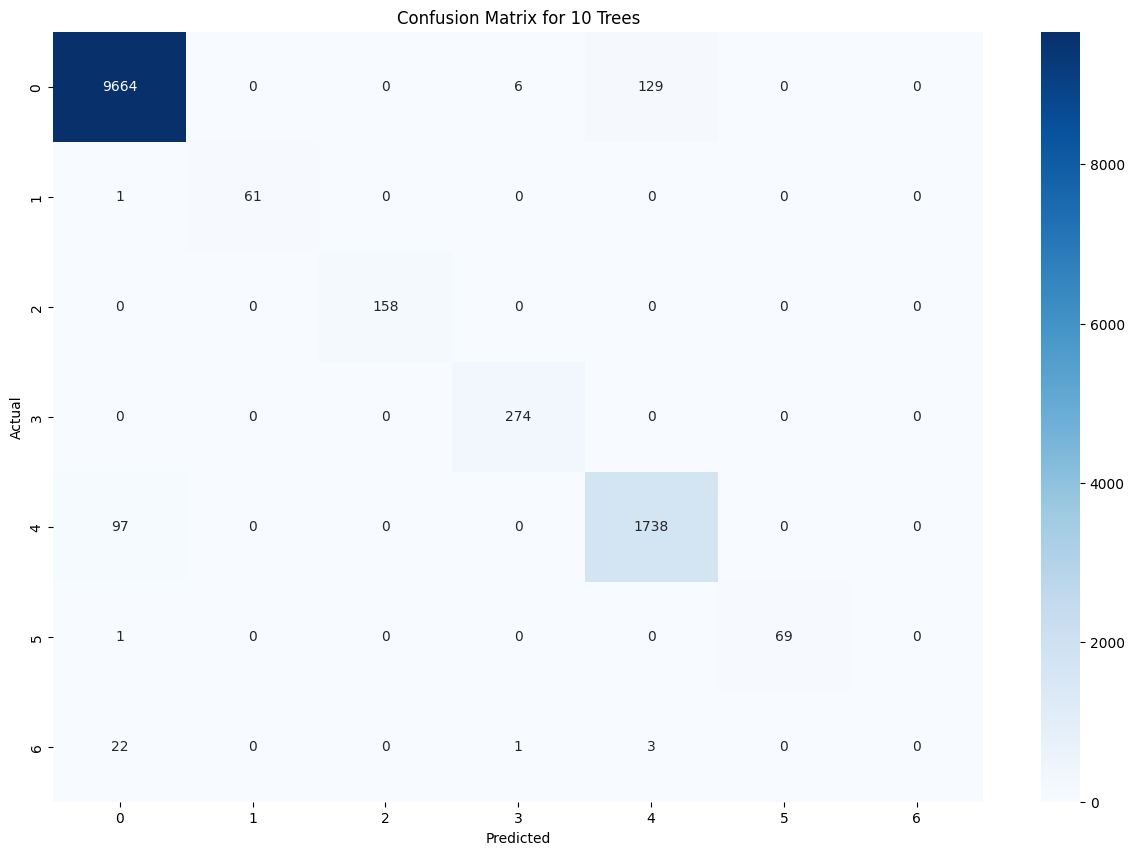

Classification Report for 10 Trees:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9799
           1       1.00      0.98      0.99        62
           2       1.00      1.00      1.00       158
           3       0.98      1.00      0.99       274
           4       0.93      0.95      0.94      1835
           5       1.00      0.99      0.99        70
           6       0.00      0.00      0.00        26

    accuracy                           0.98     12224
   macro avg       0.84      0.84      0.84     12224
weighted avg       0.98      0.98      0.98     12224

Model sudah memenuhi nilai metrik.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#cek iterasi untuk kurva pembelajaran
# Fasa penyimpanan daftar
n_estimators_list = []
accuracy_list = []
f1_list = []
precision_list = []
recall_list = []

# Daftar untuk menyimpan akurasi pelatihan dan pengujian
train_accuracies = []
test_accuracies = []
train_f1_scores = []
test_f1_scores = []

# Iterasi untuk nilai matriks
for n_estimators in range(10, 101, 10):
    rclasf.n_estimators = n_estimators
    rclasf.fit(Xcltrain, ycltrain)

    # Prediksi
    y_pred = rclasf.predict(Xcltest)

    # Evaluasi performa
    accuracy = accuracy_score(ycltest, y_pred)
    f1 = f1_score(ycltest, y_pred, average='weighted')  # Use 'weighted' for multi-class
    precision = precision_score(ycltest, y_pred, average='weighted')  # Use 'weighted' for multi-class
    recall = recall_score(ycltest, y_pred, average='weighted')  # Use 'weighted' for multi-class

    # Penyimpanan metrik
    n_estimators_list.append(n_estimators)
    accuracy_list.append(accuracy)
    f1_list.append(f1)
    precision_list.append(precision)
    recall_list.append(recall)

    # Menyimpan akurasi pelatihan dan pengujian untuk kurva belajar
    train_accuracy = accuracy_score(ycltrain, rclasf.predict(Xcltrain))
    train_f1 = f1_score(ycltrain, rclasf.predict(Xcltrain), average='weighted')

    train_accuracies.append(train_accuracy)
    test_accuracies.append(accuracy)
    train_f1_scores.append(train_f1)
    test_f1_scores.append(f1)

    print(f'Total Pohon: {n_estimators}, Akurasi: {accuracy:.2f}, Nilai F1: {f1:.2f}, Presisi: {precision:.2f}, Recall: {recall:.2f}')

    # Konversi multilabel ke label tunggal
    ycltest_single = np.argmax(ycltest.values, axis=1)  # Jika dataframe
    y_pred_single = np.argmax(y_pred, axis=1)  # NIlai tunggal dari array

    # Tampilkan nilai 'confusion matrix'
    cm = confusion_matrix(ycltest_single, y_pred_single)  # Inspeksi saat normal

    plt.figure(figsize=(15, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(len(set(ycltest))), yticklabels=range(len(set(ycltest))))
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion Matrix for {n_estimators} Trees')
    plt.show()

    # Deklarasi laporan klasifikasi dalam kondisi normal
    report = classification_report(ycltest_single, y_pred_single)
    print(f'Classification Report for {n_estimators} Trees:\n{report}')

    if accuracy >= 0.87 and f1 >= 0.87:
        print("Model sudah memenuhi nilai metrik.")
        break
    elif accuracy >= 0.87 and f1 < 0.87:
        print("Akurasi sudah memenuhi, tetapi Nilai F1 belum memenuhi.")
    elif accuracy < 0.87 and f1 >= 0.87:
        print("Nilai F1 sudah memenuhi, tetapi akurasi belum memenuhi.")
else:
    print("Model tidak memenuhi metrik yang diperlukan dengan pengaturan yang diberikan.")

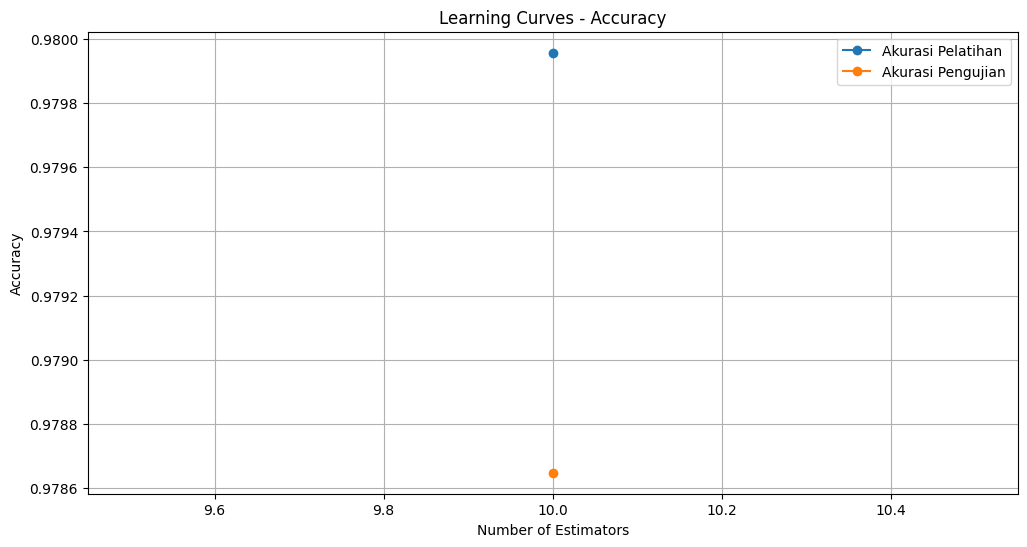

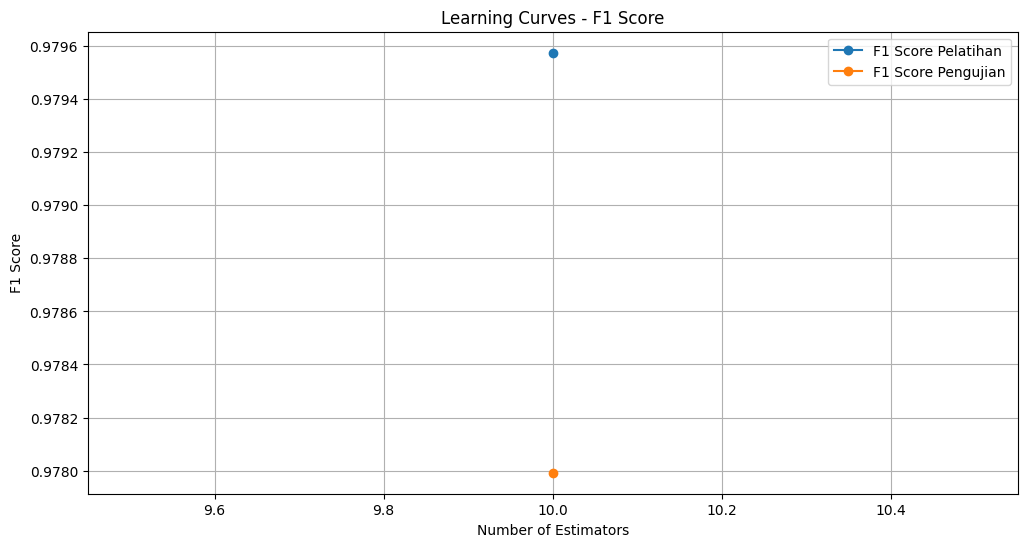

In [ ]:
# Inspeksi visualisasi normal
threshold = 0.87  # Nilai minimal threshold normal

# Visualisasi Kurva belajar untuk akurasi
plt.figure(figsize=(12, 6))
plt.plot(n_estimators_list, train_accuracies, label='Akurasi Pelatihan', marker='o')
plt.plot(n_estimators_list, test_accuracies, label='Akurasi Pengujian', marker='o')
plt.title('Learning Curves - Accuracy')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Visualisasi Kurva belajar untuk F1 Score
plt.figure(figsize=(12, 6))
plt.plot(n_estimators_list, train_f1_scores, label='F1 Score Pelatihan', marker='o')
plt.plot(n_estimators_list, test_f1_scores, label='F1 Score Pengujian', marker='o')
plt.title('Learning Curves - F1 Score')
plt.xlabel('Number of Estimators')
plt.ylabel('F1 Score')
plt.legend()
plt.grid()
plt.show()

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [ ]:
#Inisiasi gridsearch
param_grid = {'ccp_alpha': np.arange(1.75e-5, 0.175, 1.75e-4)}

Inisiasi grid memakai kondisi hampir sama dengan normal

In [ ]:
# deklarasi rclasifier (pasca grid)
rclfpgd = RandomForestClassifier(random_state=40,
    n_estimators=50,max_depth=8,
    min_samples_split=5,min_samples_leaf=3,
    warm_start=True  # Penerapan 'warm start'
)

Pemakaian 'warm start' demi menghindari **"pembakaran total"** jika salah

In [ ]:
#deklarasi pencarian grid
grid_search = GridSearchCV(estimator=rclasf, param_grid=param_grid,
                           scoring='f1_samples', cv=5, verbose=1)

In [ ]:
#Eksekusi pasca penyetelan untuk nilai ccp alpha
grid_search.fit(Xcltrain, ycltrain)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(ccp_alpha=0.001, max_depth=8,
                                              min_samples_leaf=3,
                                              min_samples_split=5,
                                              n_estimators=10, random_state=40,
                                              warm_start=True),
             param_grid={'ccp_alpha': array([1.750000e-05, 1.925000e-04, 3.675000e-04, 5.425000e-04,
       7.175000e-04, 8.925000e-04, 1.067500e-03, 1.242500e-03,
       1.417500e-03, 1.592500e-03, 1.767500e-03, 1.942500e...
       1.701175e-01, 1.702925e-01, 1.704675e-01, 1.706425e-01,
       1.708175e-01, 1.709925e-01, 1.711675e-01, 1.713425e-01,
       1.715175e-01, 1.716925e-01, 1.718675e-01, 1.720425e-01,
       1.722175e-01, 1.723925e-01, 1.725675e-01, 1.727425e-01,
       1.729175e-01, 1.730925e-01, 1.732675e-01, 1.734425e-01,
       1.736175e-01, 1.737925e-01, 1.739675e-01, 1.741425e-01,
       1.743175e-01, 1.744925e-01, 1.746675e-01, 1.748425e-01])},
             scoring='f1_samples', verbose=1)

Deklarasi dan eksekusi ccp alpha

In [ ]:
#penyetelan ccp alpha
best_alpha = grid_search.best_params_['ccp_alpha']
best_f1 = grid_search.best_score_
best_accuracy = accuracy_score(ycltest, grid_search.predict(Xcltest))

print(f'Nilai ccp_alpha terbaik adalah : {best_alpha}, Nilai F1: {best_f1:.2f}, Akurasi: {best_accuracy:.2f}')

# Deklarasi nilai alpha
rclasf.ccp_alpha = best_alpha
#ke eksekusi

Nilai ccp_alpha terbaik adalah : 1.75e-05, Nilai F1: 0.99, Akurasi: 0.99


Pencarian **nilai ccp alpha terbaik** melalui **'gridsearch'**

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:468: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Jumlah pohon: 10, Akurasi: 0.98, Nilai F1 : 0.98, Nilai presisi: 0.98, Nilai Recall: 0.98


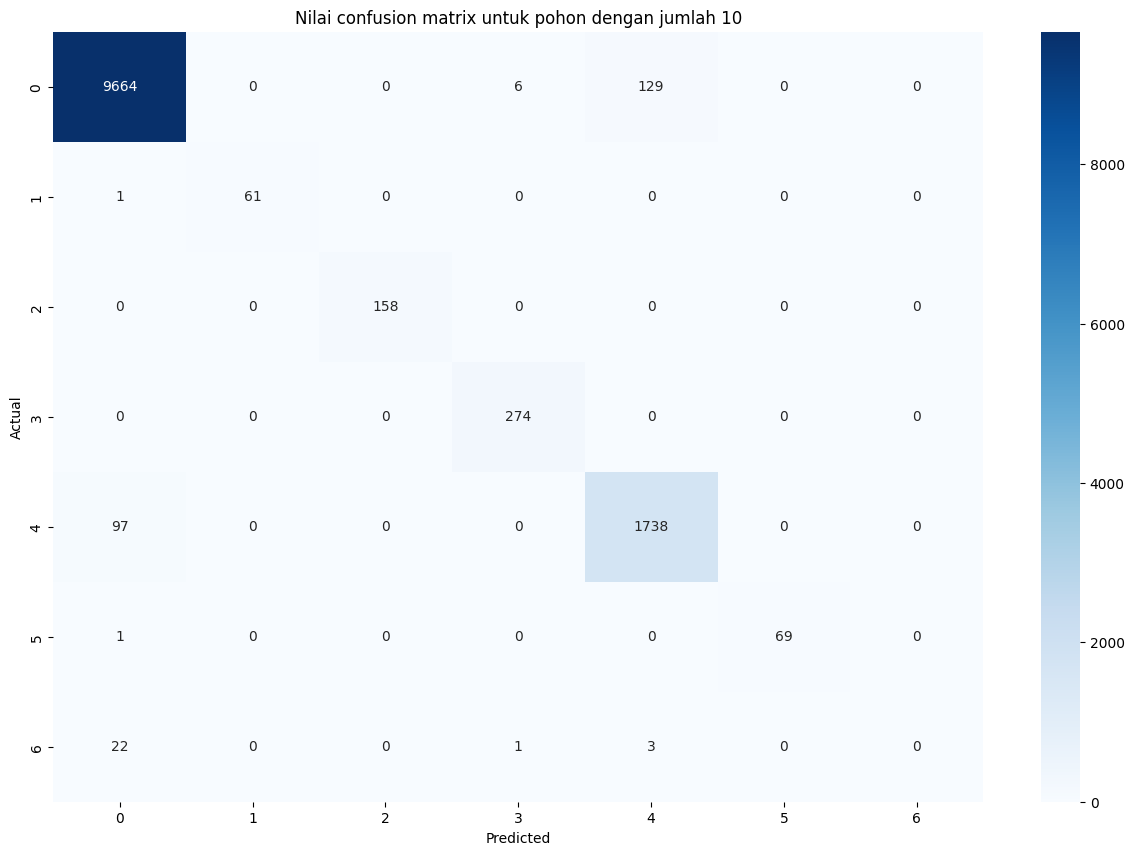

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report for 10 Trees:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9799
           1       1.00      0.98      0.99        62
           2       1.00      1.00      1.00       158
           3       0.98      1.00      0.99       274
           4       0.93      0.95      0.94      1835
           5       1.00      0.99      0.99        70
           6       0.00      0.00      0.00        26

    accuracy                           0.98     12224
   macro avg       0.84      0.84      0.84     12224
weighted avg       0.98      0.98      0.98     12224

Model sudah memenuhi nilai metrik.


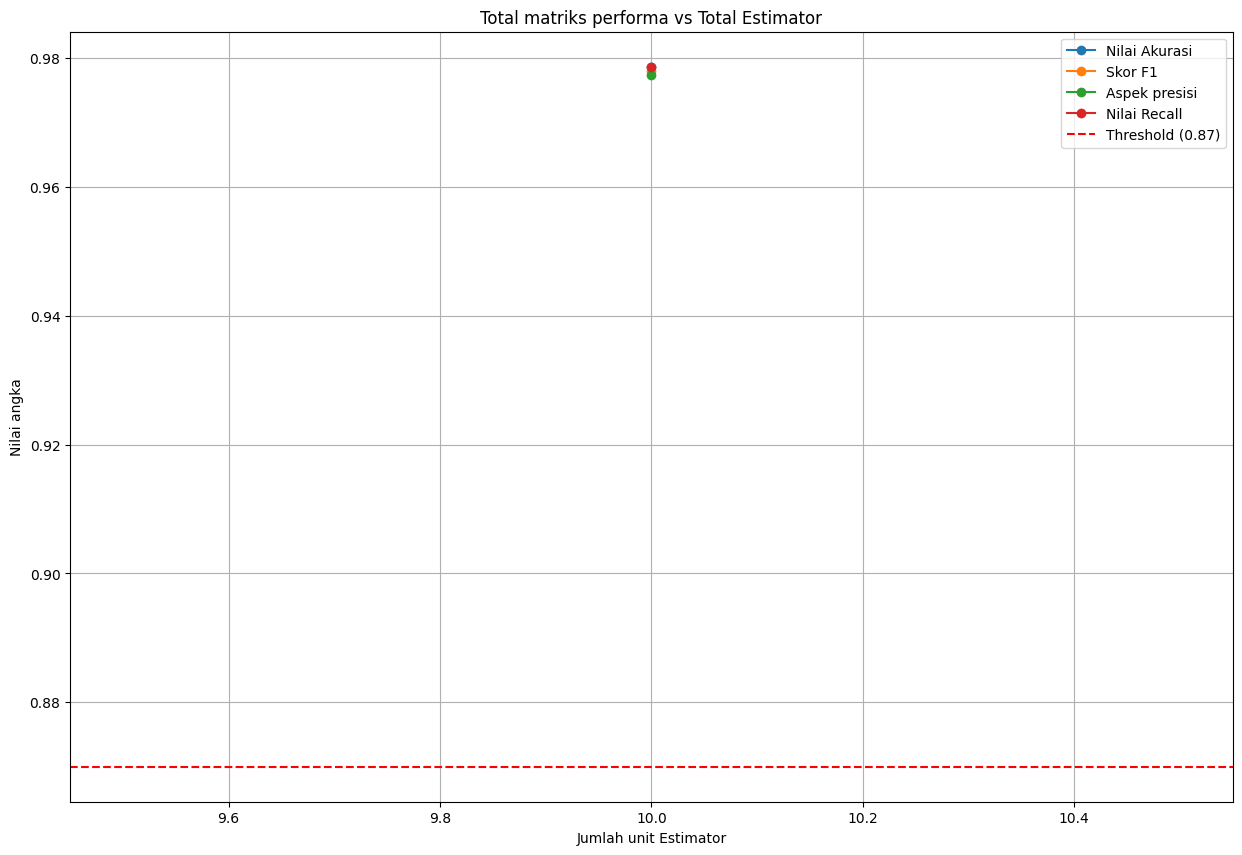

In [ ]:
# Eksekusi Bagian deklarasi daftar pasca 'grid'
accuracies = []
f1_scores = []
precisions = []
recalls = []
n_estimators_list = []

# Eksekusi dengan visualisasi
for n_estimators in range(10, 101, 10):  # Dari 10 sampai 100
    rclasf.n_estimators = n_estimators
    rclasf.fit(Xcltrain, ycltrain)

    # Prediksi
    y_pred = rclasf.predict(Xcltest)

    # Fasa evaluasi
    accuracy = accuracy_score(ycltest, y_pred)
    f1 = f1_score(ycltest, y_pred, average='weighted')  # Pemberatan pertama di akurasi
    precision = precision_score(ycltest, y_pred, average='weighted')  # Pemberatan di presisi
    recall = recall_score(ycltest, y_pred, average='weighted')  # Pemberatan pemberatan di nilai f1

    accuracies.append(accuracy)
    f1_scores.append(f1)
    precisions.append(precision)
    recalls.append(recall)
    n_estimators_list.append(n_estimators)

    print(f'Jumlah pohon: {n_estimators}, Akurasi: {accuracy:.2f}, Nilai F1 : {f1:.2f}, Nilai presisi: {precision:.2f}, Nilai Recall: {recall:.2f}')

    # Konversi multilabel ke label tunggal
    ycltest_single_label = ycltest.values.argmax(axis=1)  # Pelabelan tertinggi dari y tes
    y_pred_single_label = pd.DataFrame(y_pred).idxmax(axis=1)  # Pelabelan saat normal

    # Tampilkan nilai 'confusion matrix'
    cm = confusion_matrix(ycltest_single_label, y_pred_single_label)  # Inspeksi saat normal

    plt.figure(figsize=(15, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(len(set(ycltest_single_label))),
                yticklabels=range(len(set(ycltest_single_label))))
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Nilai confusion matrix untuk pohon dengan jumlah {n_estimators}')
    plt.show()

    # Generate and print the classification report
    report = classification_report(ycltest_single_label, y_pred_single_label)
    print(f'Classification Report for {n_estimators} Trees:\n{report}')

    if accuracy >= 0.87 and f1 >= 0.87:
        print("Model sudah memenuhi nilai metrik.")
        break
    elif accuracy >= 0.87 and f1 < 0.87:
        print("Akurasi sudah memenuhi, tetapi Nilai F1 belum memenuhi.")
    elif accuracy < 0.87 and f1 >= 0.87:
        print("Nilai F1 sudah memenuhi, tetapi akurasi belum memenuhi.")
else:
    print("Model tidak memenuhi metrik yang diperlukan dengan pengaturan yang diberikan.")

# Cek visualisasi saat numerik
plt.figure(figsize=(15, 10))
plt.plot(n_estimators_list, accuracies, label='Nilai Akurasi', marker='o')
plt.plot(n_estimators_list, f1_scores, label='Skor F1', marker='o')
plt.plot(n_estimators_list, precisions, label='Aspek presisi', marker='o')
plt.plot(n_estimators_list, recalls, label='Nilai Recall', marker='o') #di bahasa inggris disebut 'recall'

plt.axhline(y=0.87, color='r', linestyle='--', label='Threshold (0.87)')
plt.title('Total matriks performa vs Total Estimator')
plt.xlabel('Jumlah unit Estimator')
plt.ylabel('Nilai angka')
plt.legend()
plt.grid()
plt.show()

Hasil pasca 'pemakaian gridsearxh'

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

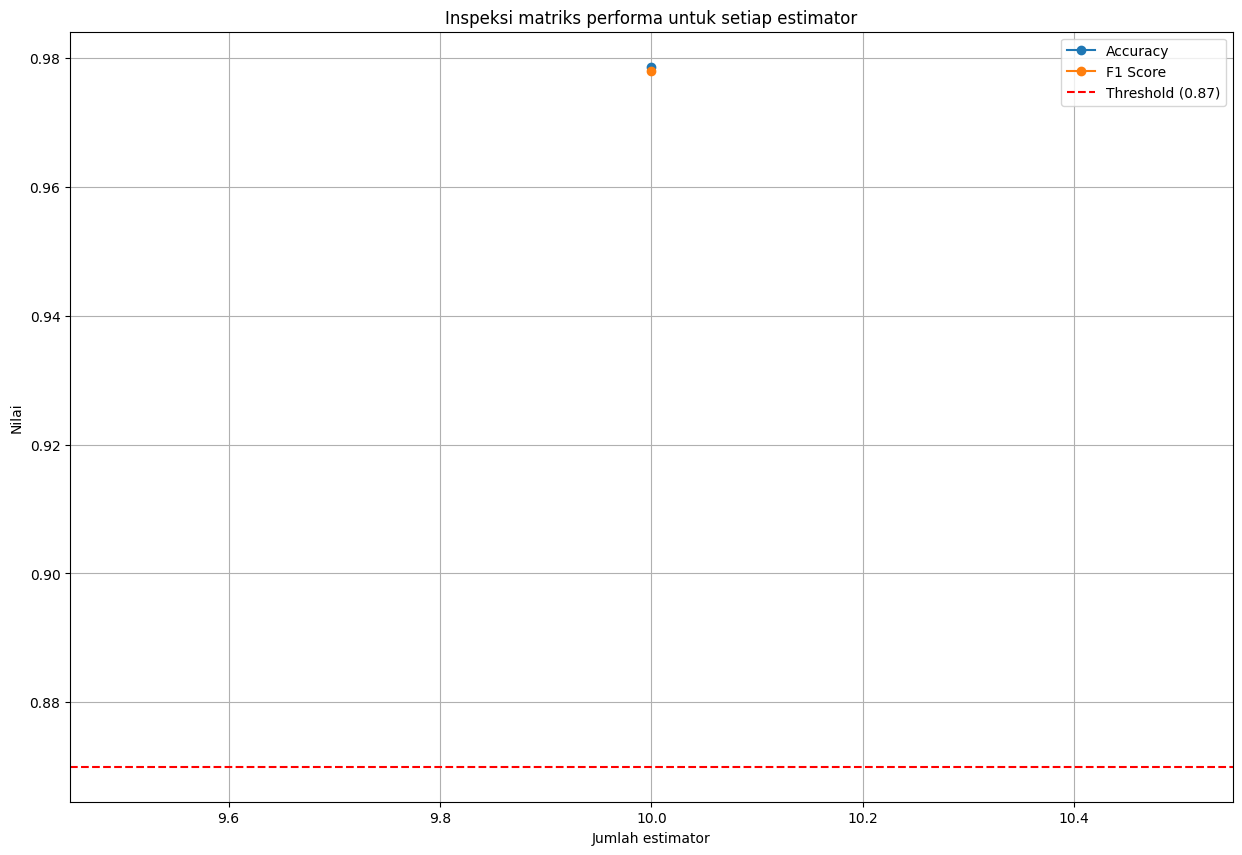

In [ ]:
#Perbandingan hasil konvesional dengan hasil 'tuning' melalui cvgrid dengan 'perbandingan estimasi'
plt.figure(figsize=(15, 10))
plt.plot(n_estimators_list, accuracies, label='Accuracy', marker='o')
plt.plot(n_estimators_list, f1_scores, label='F1 Score', marker='o')
plt.axhline(y=0.87, color='r', linestyle='--', label='Threshold (0.87)')
plt.title('Inspeksi matriks performa untuk setiap estimator')
plt.xlabel('Jumlah estimator')
plt.ylabel('Nilai')
plt.legend()
plt.grid()
plt.show()

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

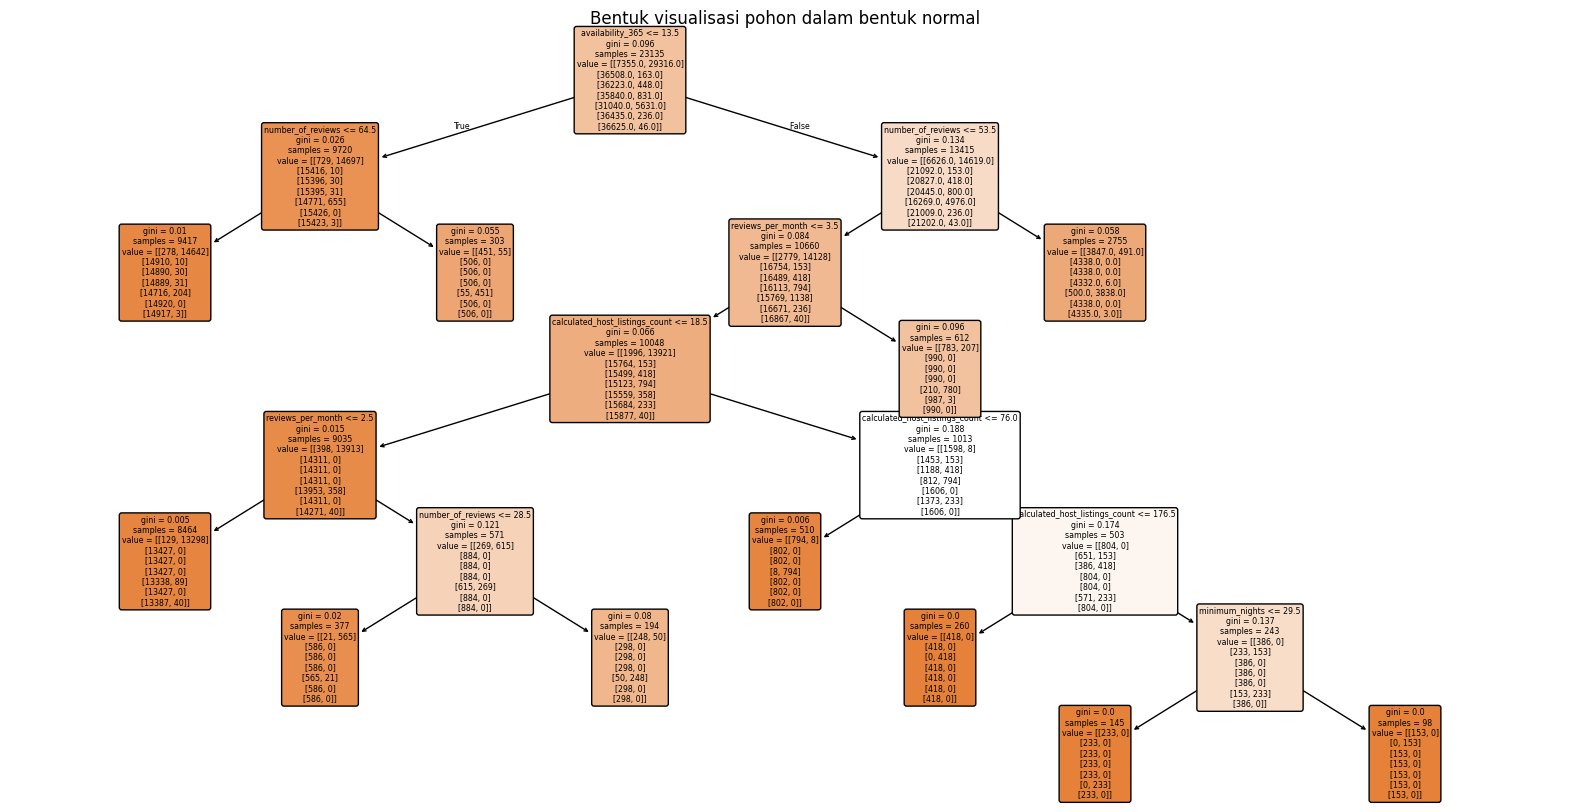

In [ ]:
#inspeksi bentuk 'pohon keputusan' normal
nrmpl = rclasf.estimators_[0]
plt.figure(figsize=(20,10))
plot_tree(nrmpl, filled=True, feature_names=Xcltrain.columns, rounded=True)
plt.title("Bentuk visualisasi pohon dalam bentuk normal")
plt.show()

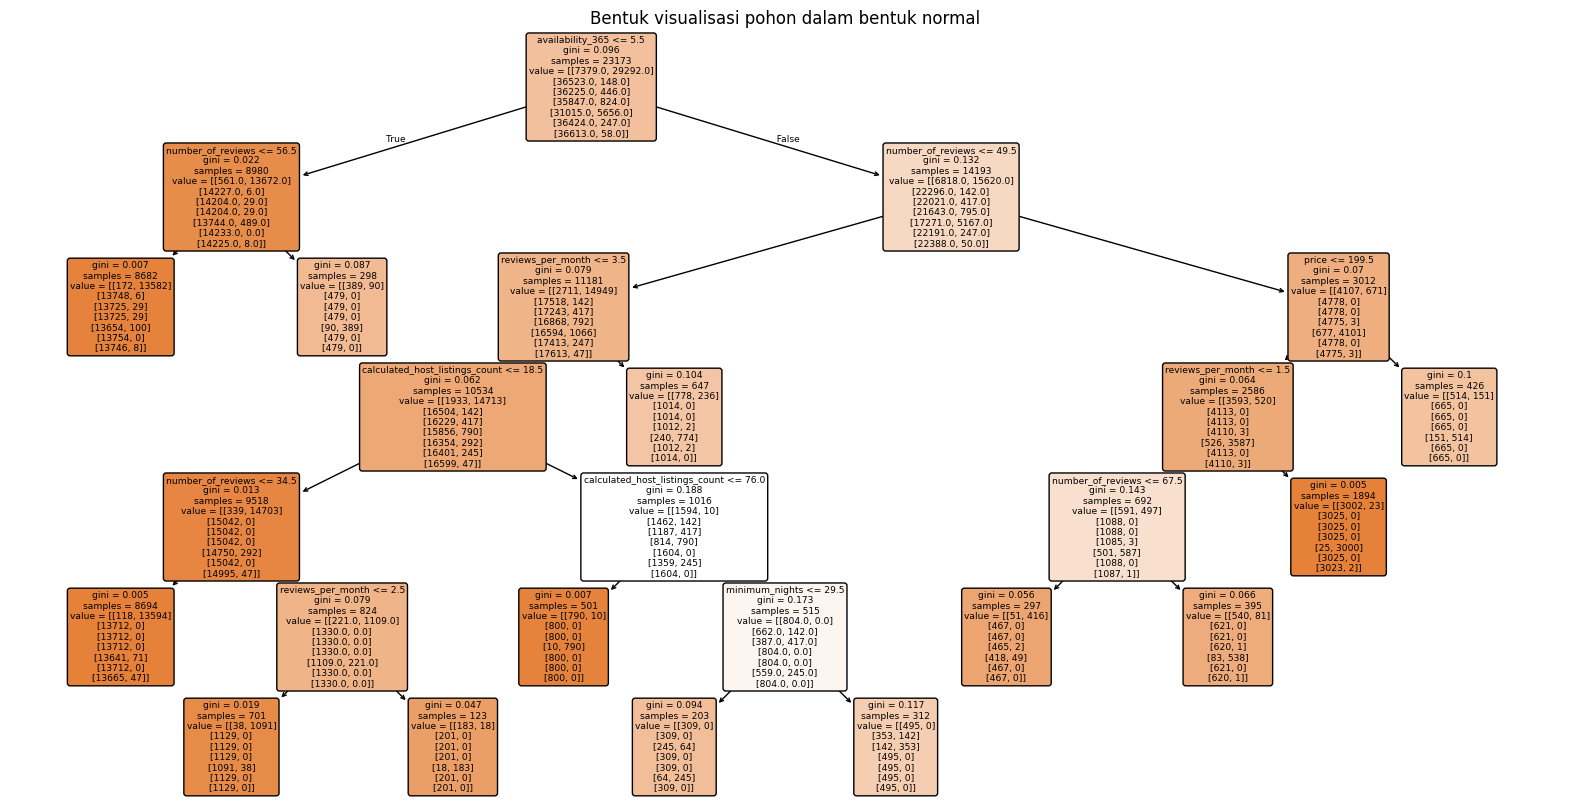

In [ ]:
#lanjutan metode normal
nrmpl1 = rclasf.estimators_[1]
plt.figure(figsize=(20,10))
plot_tree(nrmpl1, filled=True, feature_names=Xcltrain.columns, rounded=True)
plt.title("Bentuk visualisasi pohon dalam bentuk normal")
plt.show()

### Pemakaian gridsearch

In [ ]:
#penyetelan
rclfpgd.fit(Xcltrain, ycltrain) #pelatihan untuk Xcl dan ycl (klasifikasi X dan y)

RandomForestClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=50, random_state=40, warm_start=True)

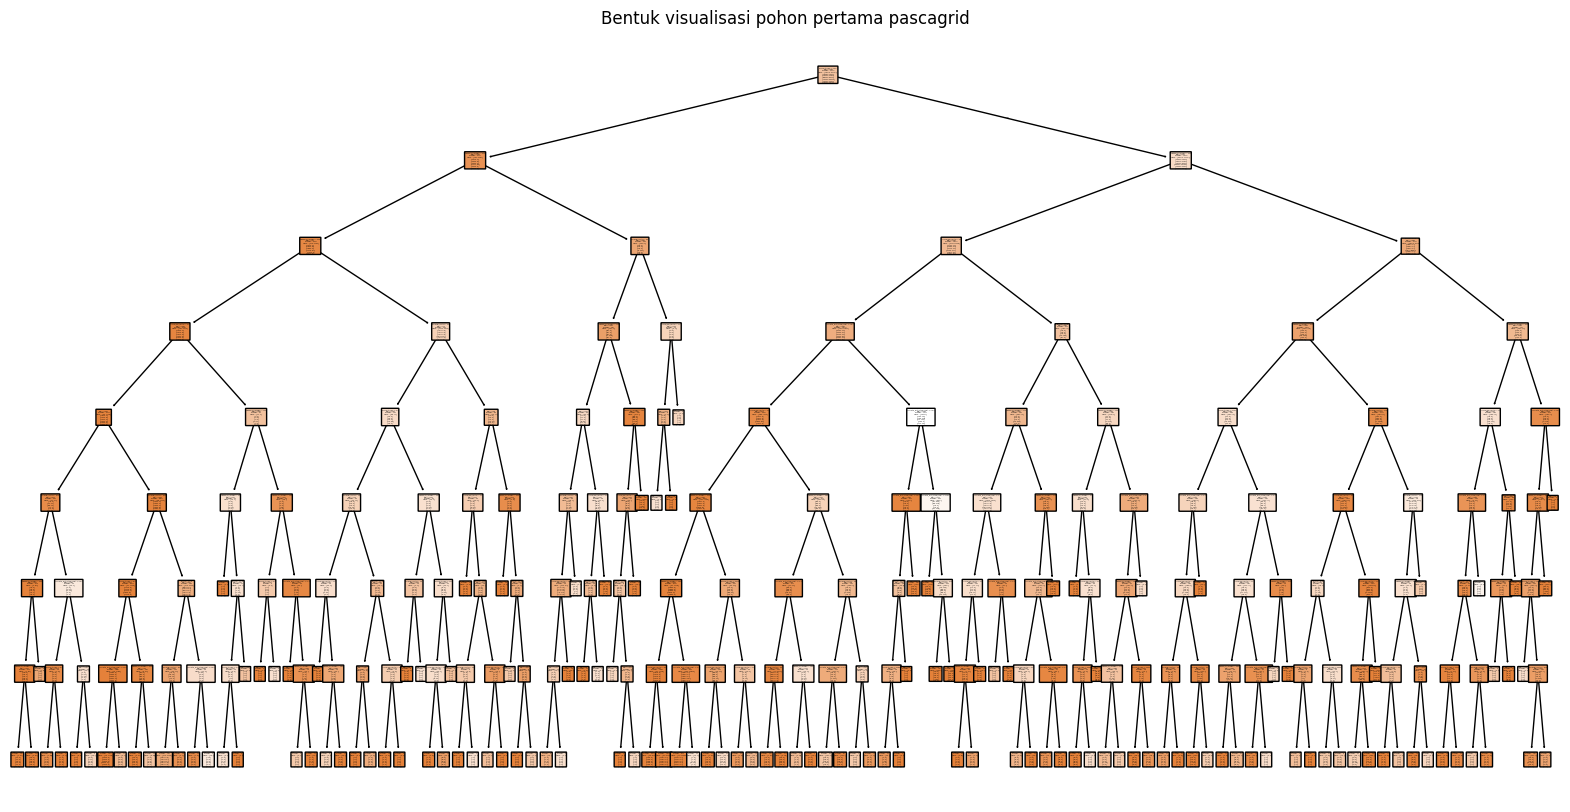

In [ ]:
#visualisasi pertama pasca pemakaian gridsearch
grdvis = rclfpgd.estimators_[0]
plt.figure(figsize=(20,10))
plot_tree(grdvis, filled=True, feature_names=Xcltrain.columns, rounded=True)
plt.title("Bentuk visualisasi pohon pertama pascagrid")
plt.show()

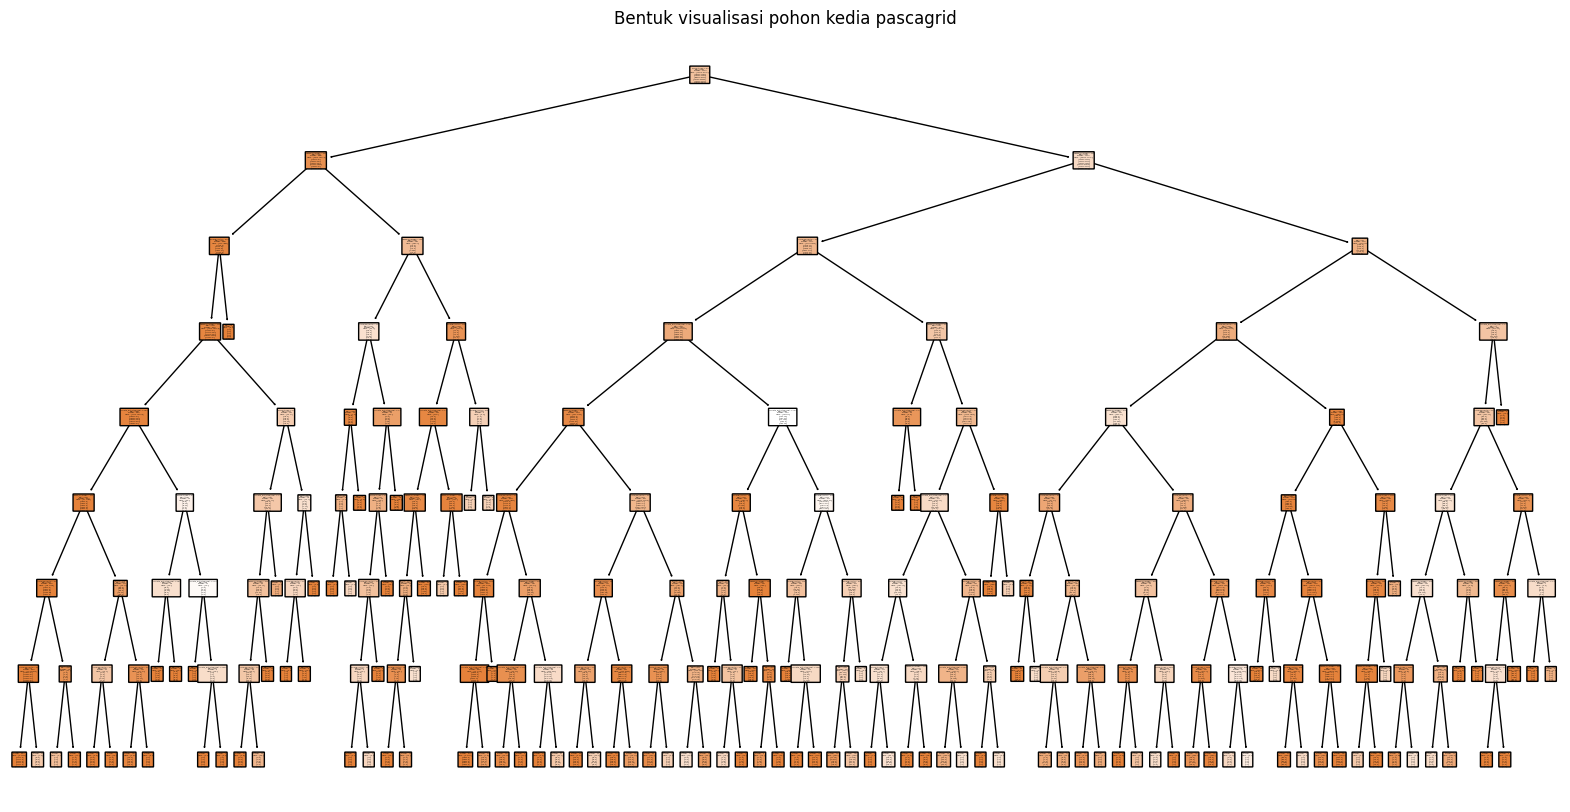

In [ ]:
#pemakaian grid untuk visalisasi kedua
grdvis1 = rclfpgd.estimators_[1]
plt.figure(figsize=(20,10))
plot_tree(grdvis1, filled=True, feature_names=Xcltrain.columns, rounded=True)
plt.title("Bentuk visualisasi pohon kedia pascagrid")
plt.show()

### Rekomendasi tahap
* a. Hasil model setelah tuning memang membutuhkan waktu lebih lama dengan resiko kelebihan RAM, tetapi hasil ini memberikan pohon yang lebih terstruktur daripada normal
** a.2. Rincian untuk pemakaian grid **"sangat tertata"** walaupun bentuk tidak teratur
** a.3. Proses **"tuning"** memperlama pencarian nilai ccp alpha daripada normal
* b. Identifikasi kelemahan model
** b.1. model bisa mengalami penurunan akurasi tajam dengan nilai ccp alpha yang tinggi di kondisi **"normal"**
** b.2. Bentuk kurva pembelajaran **"learning curve"** yang tidak meyakinkan karena nilai mengalmi penumpukan di satu kondisi
** b.3. durasi eksekusi yang lama walau teknik ini menghemat RAM
** b.4 data bisa mengalmi bias tinggi jika penyebaran kluster rata karena basis dari klasifikasi
* c rekomendasi perbaikan
** c.1. pakai metode lain dengan penerapan 'nilai ccp alpha' dinamis seperti diatas
** c.2. masukan aspek lain seperti lintang dan bujur